In [159]:
# First, we'll import pandas, a data processing and CSV file I/O library
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import missingno as msno

# We'll also import seaborn, a Python graphing library
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

# Next, we'll load the Iris flower dataset, which is in the "../input/" directory
df = pd.read_excel("./OppScrData.xlsx") # the iris dataset is now a Pandas DataFrame

# Let's see what's in the iris data - Jupyter notebooks print the result of the last thing you do
# df.head()
df.describe()

# Press shift+enter to execute this cell

Record ID      Visit ID         PT ID  \
count   9223.000000   9223.000000   9223.000000   
mean    5669.447902   5664.570096   5021.384907   
std     3233.661199   3484.630147   3050.609532   
min        1.000000    357.000000     15.000000   
25%     2887.500000   2775.500000   2433.500000   
50%     5709.000000   5251.000000   4823.000000   
75%     8388.500000   7872.500000   7431.500000   
max    11331.000000  13523.000000  10985.000000   

       Clinical F/U interval  [d from CT]          BMI    Age at CT  \
count                         9223.000000  9100.000000  9223.000000   
mean                          2936.050201    28.846033    57.093679   
std                           1481.597151     6.541126     7.829047   
min                              0.000000     0.300000    23.000000   
25%                           1858.000000    24.500000    51.000000   
50%                           3205.000000    27.600000    56.000000   
75%                           4221.000000    31.700000    61.000000   
max                           5201.000000    89.300000    95.000000   

       CLINICAL OUTCOMES  DEATH [d from CT]  CVD DX Date [d from CT]  \
count                0.0         549.000000               901.000000   
mean                 NaN        2268.253188               686.237514   
std                  NaN        1314.409179              1792.690580   
min                  NaN           9.000000             -4574.000000   
25%                  NaN        1154.000000              -554.000000   
50%                  NaN        2225.000000               577.000000   
75%                  NaN        3347.000000              1984.000000   
max                  NaN        5070.000000              5062.000000   

       Heart failure DX Date [d from CT]  ...    L1_HU_BMD  TAT Area (cm2)  \
count                         643.000000  ...  9176.000000     9091.000000   
mean                          985.158631  ...   171.167720      377.708045   
std                          2021.954911  ...    42.250455      188.051371   
min                         -4932.000000  ...   -20.000000        0.000000   
25%                          -523.000000  ...   142.000000      242.505009   
50%                          1025.000000  ...   168.000000      355.743590   
75%                          2652.500000  ...   197.000000      484.162523   
max                          4934.000000  ...   378.000000     1206.222222   

       Total Body                Area EA (cm2)  VAT Area (cm2)  \
count                              9091.000000     9091.000000   
mean                                672.207190      172.991393   
std                                 220.512034      120.586593   
min                                 253.376871        0.000000   
25%                                 514.288386       84.587216   
50%                                 641.161538      148.569697   
75%                                 787.605688      229.832754   
max                                1859.699346     1054.685714   

       SAT Area (cm2)  VAT/SAT     Ratio    Muscle HU   Muscle Area (cm2)  \
count     9091.000000        9090.000000  9195.000000         9195.000000   
mean       208.044914           0.907246    28.913116          154.362254   
std        105.212502           0.710412    12.109405           45.938823   
min          0.000000           0.130985  -118.307532            9.376304   
25%        131.455115           0.480806    22.265564          122.020057   
50%        189.943243           0.722089    30.661951          147.474269   
75%        268.287229           1.155669    37.513563          185.740992   
max        763.112121          26.340177    99.484949         1605.744327   

       L3 SMI (cm2/m2)  AoCa        Agatston  
count      9071.000000           9222.000000  
mean         52.845874            698.799375  
std          12.532750           1747.953761  
min           0.562102              0.000000  
25%          44.504159            

In [160]:
# Let's see how many examples we have of each species
df["BMI >30"].value_counts()

N    5984
Y    3116
Name: BMI >30, dtype: int64

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Total Body                Area EA (cm2)', ylabel='TAT Area (cm2)'>

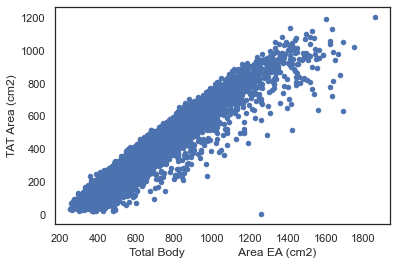

In [161]:
df.plot(kind="scatter", x="Total Body                Area EA (cm2)", y="TAT Area (cm2)", )


In [162]:
import plotly.express as px
fig = px.imshow(df.corr())
fig.show()

<AxesSubplot:>

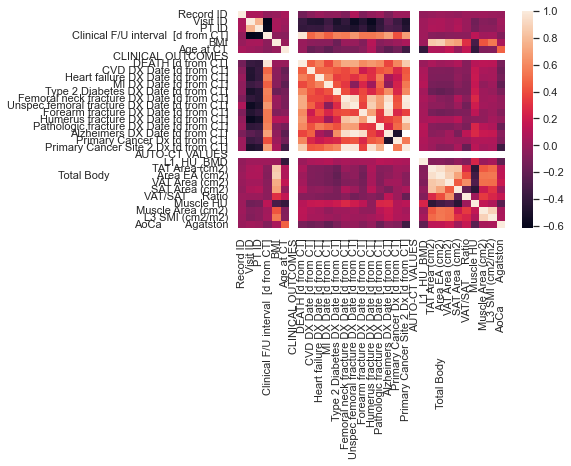

In [163]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

<AxesSubplot:>

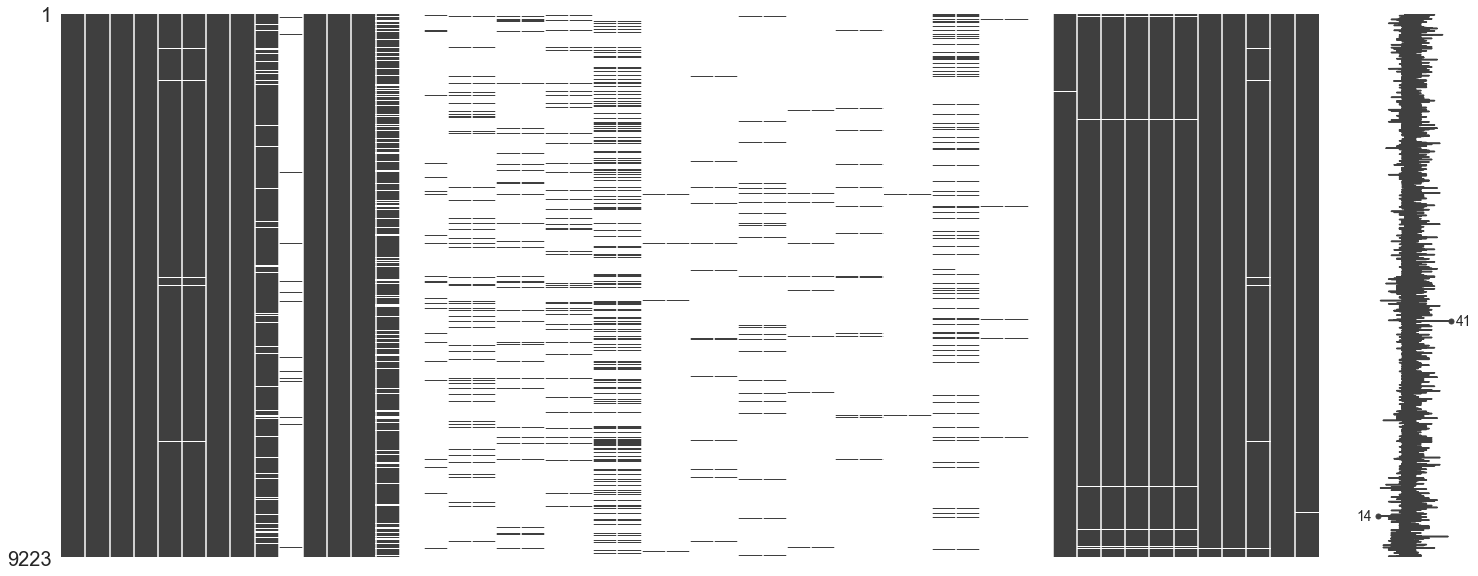

In [164]:
msno.matrix(df)


<AxesSubplot:>

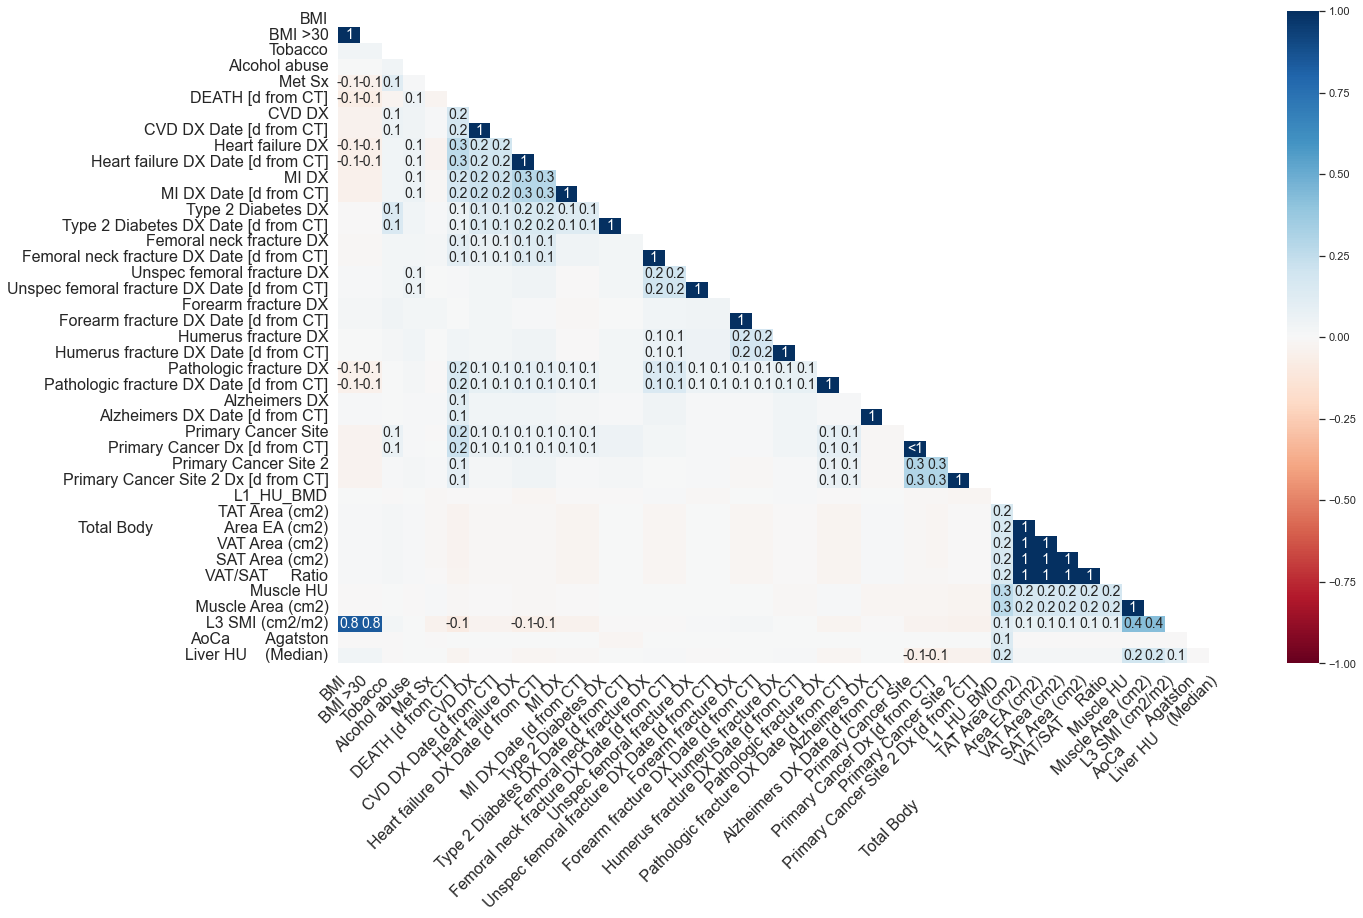

In [165]:
msno.heatmap(df)


<AxesSubplot:>

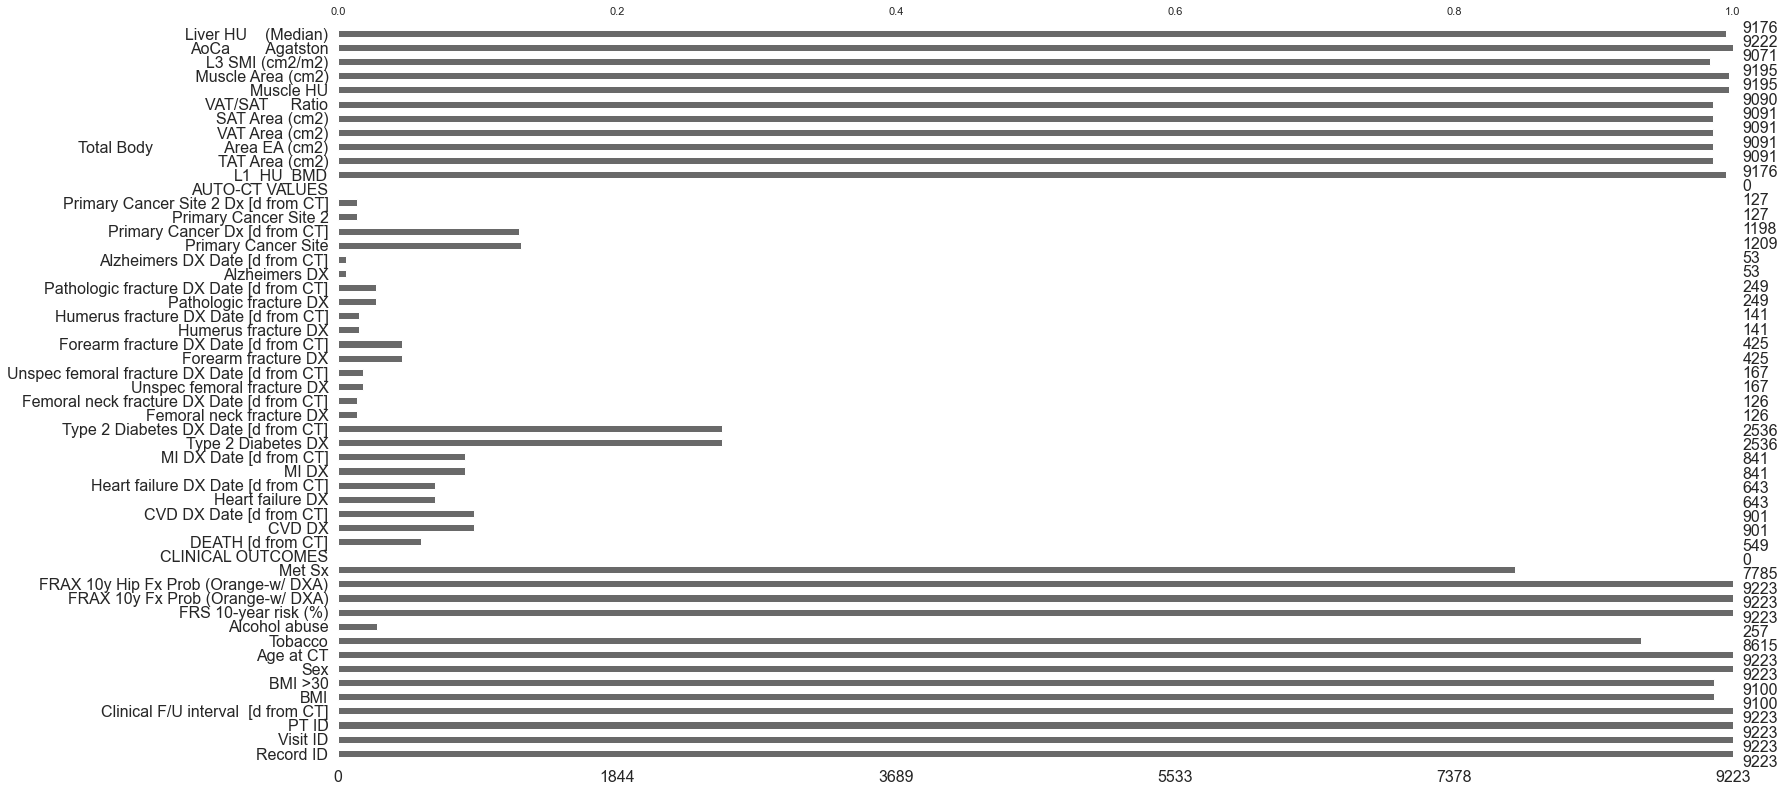

In [166]:
msno.bar(df)


<AxesSubplot:>

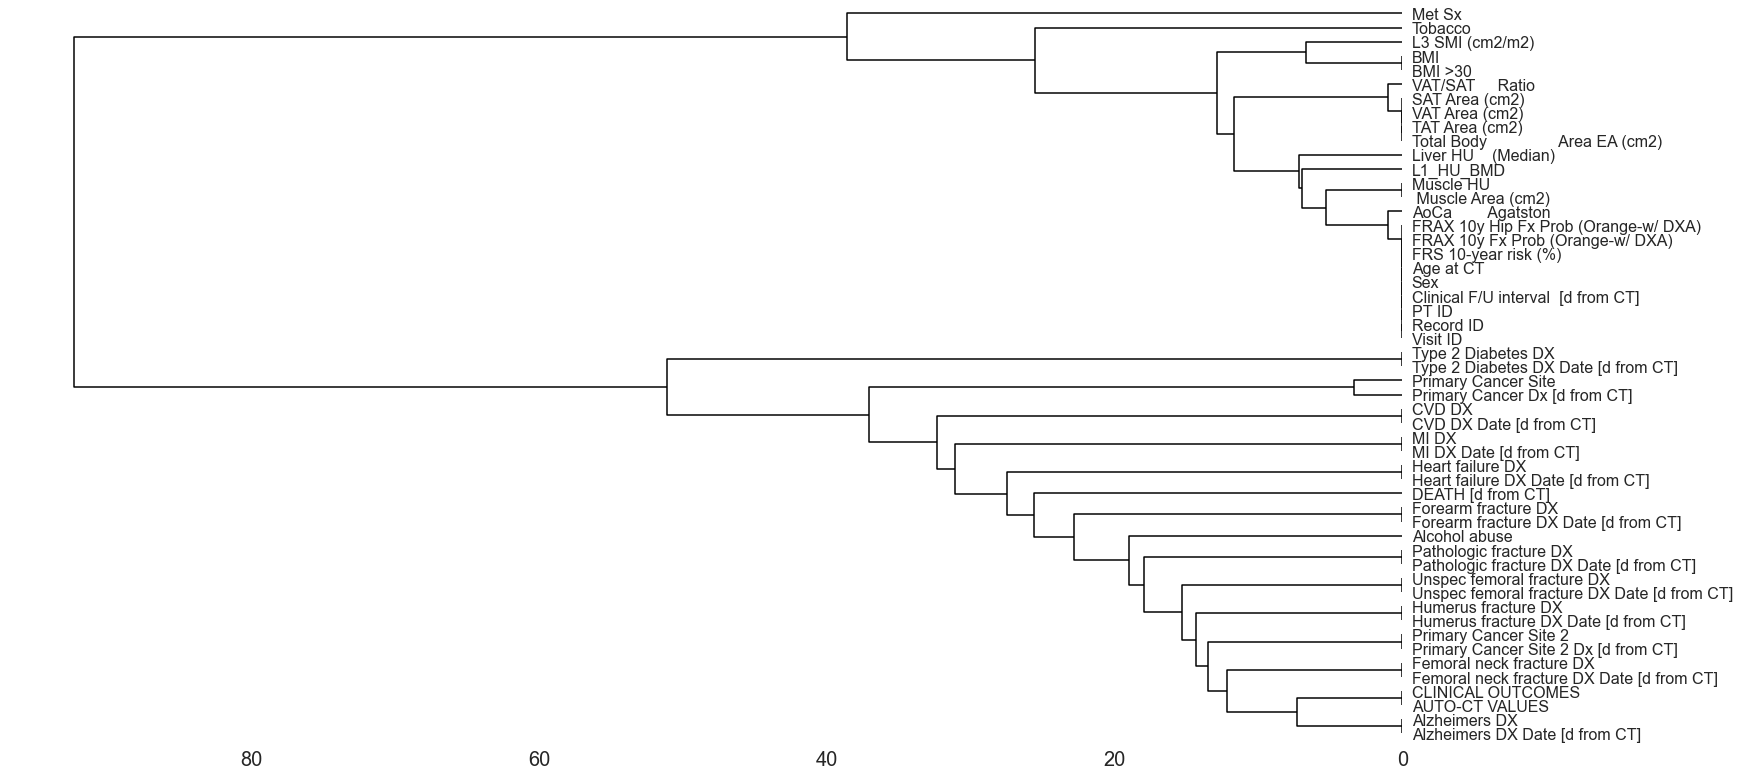

In [167]:
msno.dendrogram(df)


In [168]:
df.skew(), df.kurt()


(Record ID                                     -0.013658
 Visit ID                                       0.473899
 PT ID                                          0.203919
 Clinical F/U interval  [d from CT]            -0.479741
 BMI                                            1.527173
 Age at CT                                      1.022977
 CLINICAL OUTCOMES                                   NaN
 DEATH [d from CT]                              0.079242
 CVD DX Date [d from CT]                       -0.047331
 Heart failure DX Date [d from CT]             -0.225476
 MI DX Date [d from CT]                         0.191116
 Type 2 Diabetes DX Date [d from CT]           -0.268871
 Femoral neck fracture DX Date [d from CT]     -0.308880
 Unspec femoral fracture DX Date [d from CT]   -0.894101
 Forearm fracture DX Date [d from CT]          -0.128567
 Humerus fracture DX Date [d from CT]          -0.159000
 Pathologic fracture DX Date [d from CT]       -0.218679
 Alzheimers DX Date [d from CT]

In [169]:
# normal
# y = df.dropna(subset=['DEATH [d from CT]'])
# y = y['DEATH [d from CT]']
# plt.figure(1); plt.title('Johnson SU')
# sns.distplot(y, kde=False, fit=st.johnsonsu)
# plt.figure(2); plt.title('Normal')
# sns.distplot(y, kde=False, fit=st.norm)
# plt.figure(3); plt.title('Log Normal')
# sns.distplot(y, kde=False, fit=st.lognorm)


# Normal
# y = df.dropna(subset=['CVD DX Date [d from CT]'])
# y = y['CVD DX Date [d from CT]']
# plt.figure(1); plt.title('Johnson SU')
# sns.distplot(y, kde=False, fit=st.johnsonsu)
# plt.figure(2); plt.title('Normal')
# sns.distplot(y, kde=False, fit=st.norm)
# plt.figure(3); plt.title('Log Normal')
# sns.distplot(y, kde=False, fit=st.lognorm)

#normal
# y = df.dropna(subset=['Heart failure DX Date [d from CT]'])
# y = y['Heart failure DX Date [d from CT]']
# plt.figure(1); plt.title('Johnson SU')
# sns.distplot(y, kde=False, fit=st.johnsonsu)
# plt.figure(2); plt.title('Normal')
# sns.distplot(y, kde=False, fit=st.norm)
# plt.figure(3); plt.title('Log Normal')
# sns.distplot(y, kde=False, fit=st.lognorm)


# y = df.dropna(subset=['MI DX Date [d from CT]'])
# y = y['MI DX Date [d from CT]']
# plt.figure(1); plt.title('Johnson SU')
# sns.distplot(y, kde=False, fit=st.johnsonsu)
# plt.figure(2); plt.title('Normal')
# sns.distplot(y, kde=False, fit=st.norm)
# plt.figure(3); plt.title('Log Normal')
# sns.distplot(y, kde=False, fit=st.lognorm)


#normal
# y = df.dropna(subset=['Type 2 Diabetes DX Date [d from CT]'])
# y = y['Type 2 Diabetes DX Date [d from CT]']
# plt.figure(1); plt.title('Johnson SU')
# sns.distplot(y, kde=False, fit=st.johnsonsu)
# plt.figure(2); plt.title('Normal')
# sns.distplot(y, kde=False, fit=st.norm)
# plt.figure(3); plt.title('Log Normal')
# sns.distplot(y, kde=False, fit=st.lognorm)

In [170]:
# sns.distplot(df.skew(),color='blue',axlabel ='Skewness')


In [171]:
# correlation = d.corr()
print(df.corr()['DEATH [d from CT]'].sort_values(ascending = False),'\n')

DEATH [d from CT]                              1.000000
Clinical F/U interval  [d from CT]             0.975387
Primary Cancer Site 2 Dx [d from CT]           0.859301
Unspec femoral fracture DX Date [d from CT]    0.729925
Femoral neck fracture DX Date [d from CT]      0.728267
Humerus fracture DX Date [d from CT]           0.658246
Forearm fracture DX Date [d from CT]           0.606438
Pathologic fracture DX Date [d from CT]        0.604141
Type 2 Diabetes DX Date [d from CT]            0.593181
Primary Cancer Dx [d from CT]                  0.589643
Heart failure DX Date [d from CT]              0.567849
CVD DX Date [d from CT]                        0.450134
MI DX Date [d from CT]                         0.382946
Alzheimers DX Date [d from CT]                 0.370391
 Muscle Area (cm2)                             0.129831
L3 SMI (cm2/m2)                                0.125381
Muscle HU                                      0.109990
SAT Area (cm2)                                 0

In [6]:
categorical_features = df.select_dtypes(include=[np.object])

categorical_features.columns

Index(['BMI >30', 'Sex', 'Tobacco', 'Alcohol abuse', 'FRS 10-year risk (%)',
       'FRAX 10y Fx Prob (Orange-w/ DXA)',
       'FRAX 10y Hip Fx Prob (Orange-w/ DXA)', 'Met Sx', 'CVD DX',
       'Heart failure DX', 'MI DX', 'Type 2 Diabetes DX',
       'Femoral neck fracture DX', 'Unspec femoral fracture DX',
       'Forearm fracture DX', 'Humerus fracture DX', 'Pathologic fracture DX',
       'Alzheimers DX', 'Primary Cancer Site', 'Primary Cancer Site 2',
       'Liver HU    (Median)'],
      dtype='object')

<AxesSubplot:title={'center':'Correlation of Numeric Features with Sale Price'}>

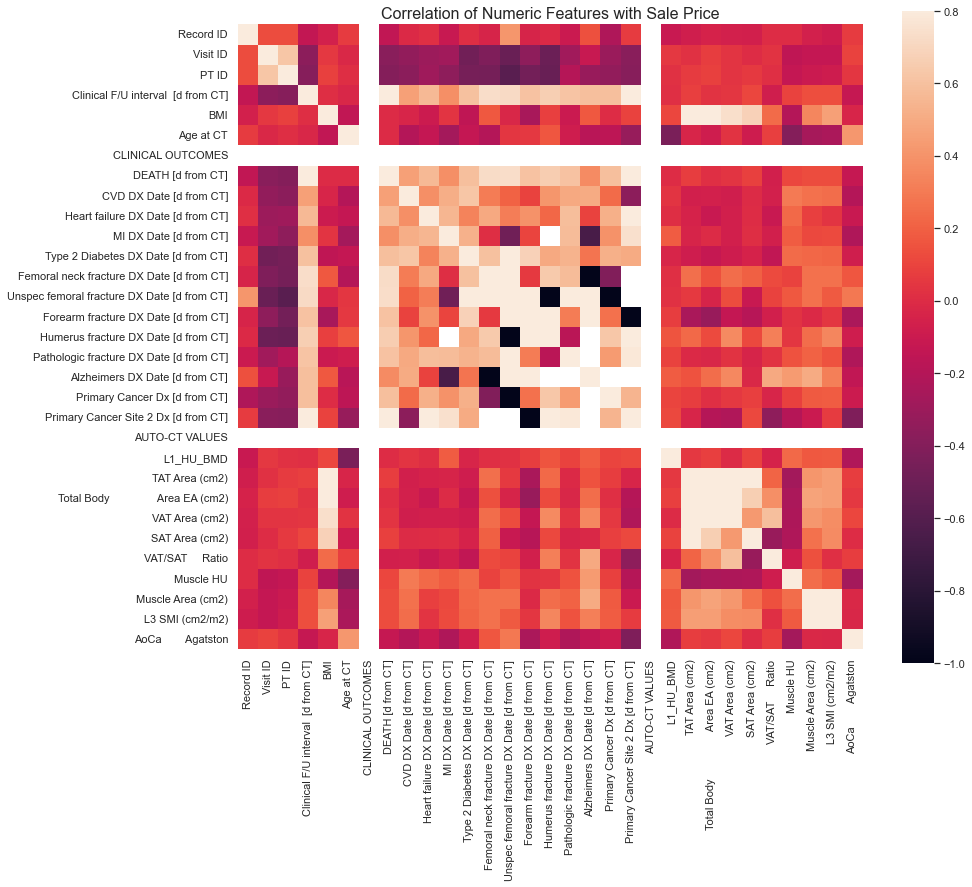

In [60]:
f , ax = plt.subplots(figsize = (14,12))

plt.title('Correlation of Numeric Features with Sale Price',y=1,size=16)

sns.heatmap(y.corr(),square = True,  vmax=0.8)


Index(['DEATH [d from CT]', 'Clinical F/U interval  [d from CT]',
       'Primary Cancer Site 2 Dx [d from CT]',
       'Unspec femoral fracture DX Date [d from CT]',
       'Femoral neck fracture DX Date [d from CT]',
       'Humerus fracture DX Date [d from CT]',
       'Forearm fracture DX Date [d from CT]',
       'Pathologic fracture DX Date [d from CT]',
       'Type 2 Diabetes DX Date [d from CT]', 'Primary Cancer Dx [d from CT]',
       'Heart failure DX Date [d from CT]'],
      dtype='object')


<AxesSubplot:>

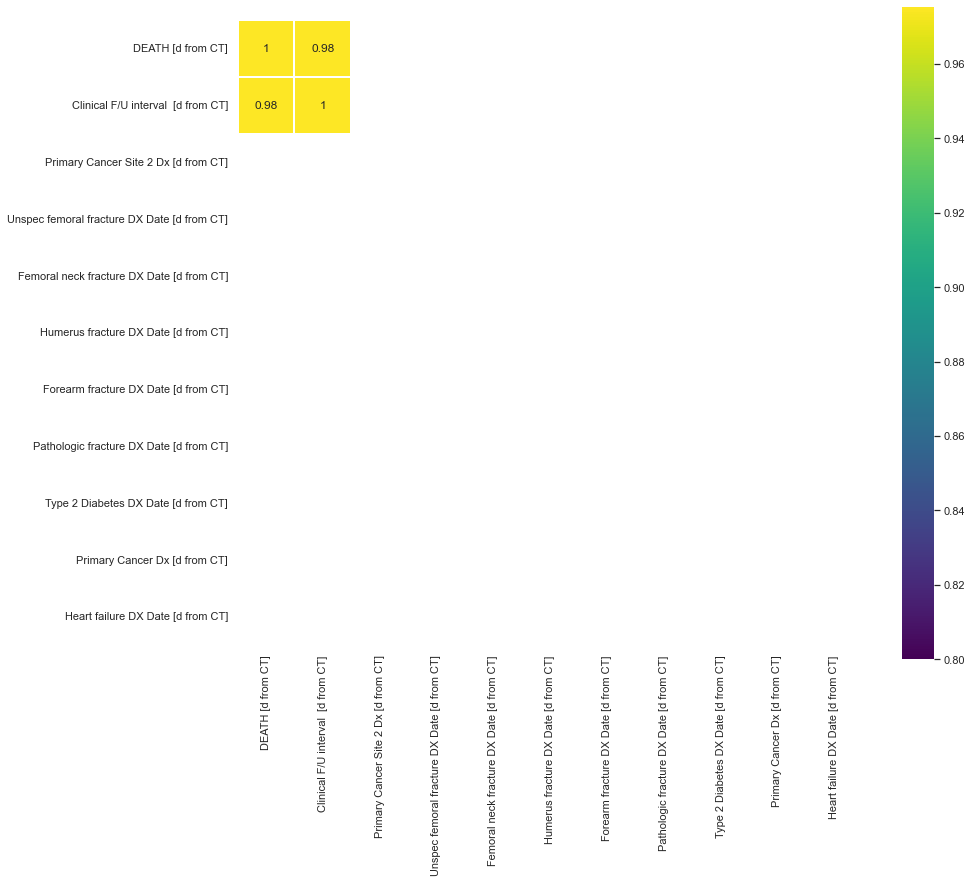

In [66]:
k= 11
cols = y.corr().nlargest(k,'DEATH [d from CT]')['DEATH [d from CT]'].index
print(cols)
cm = np.corrcoef(y[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

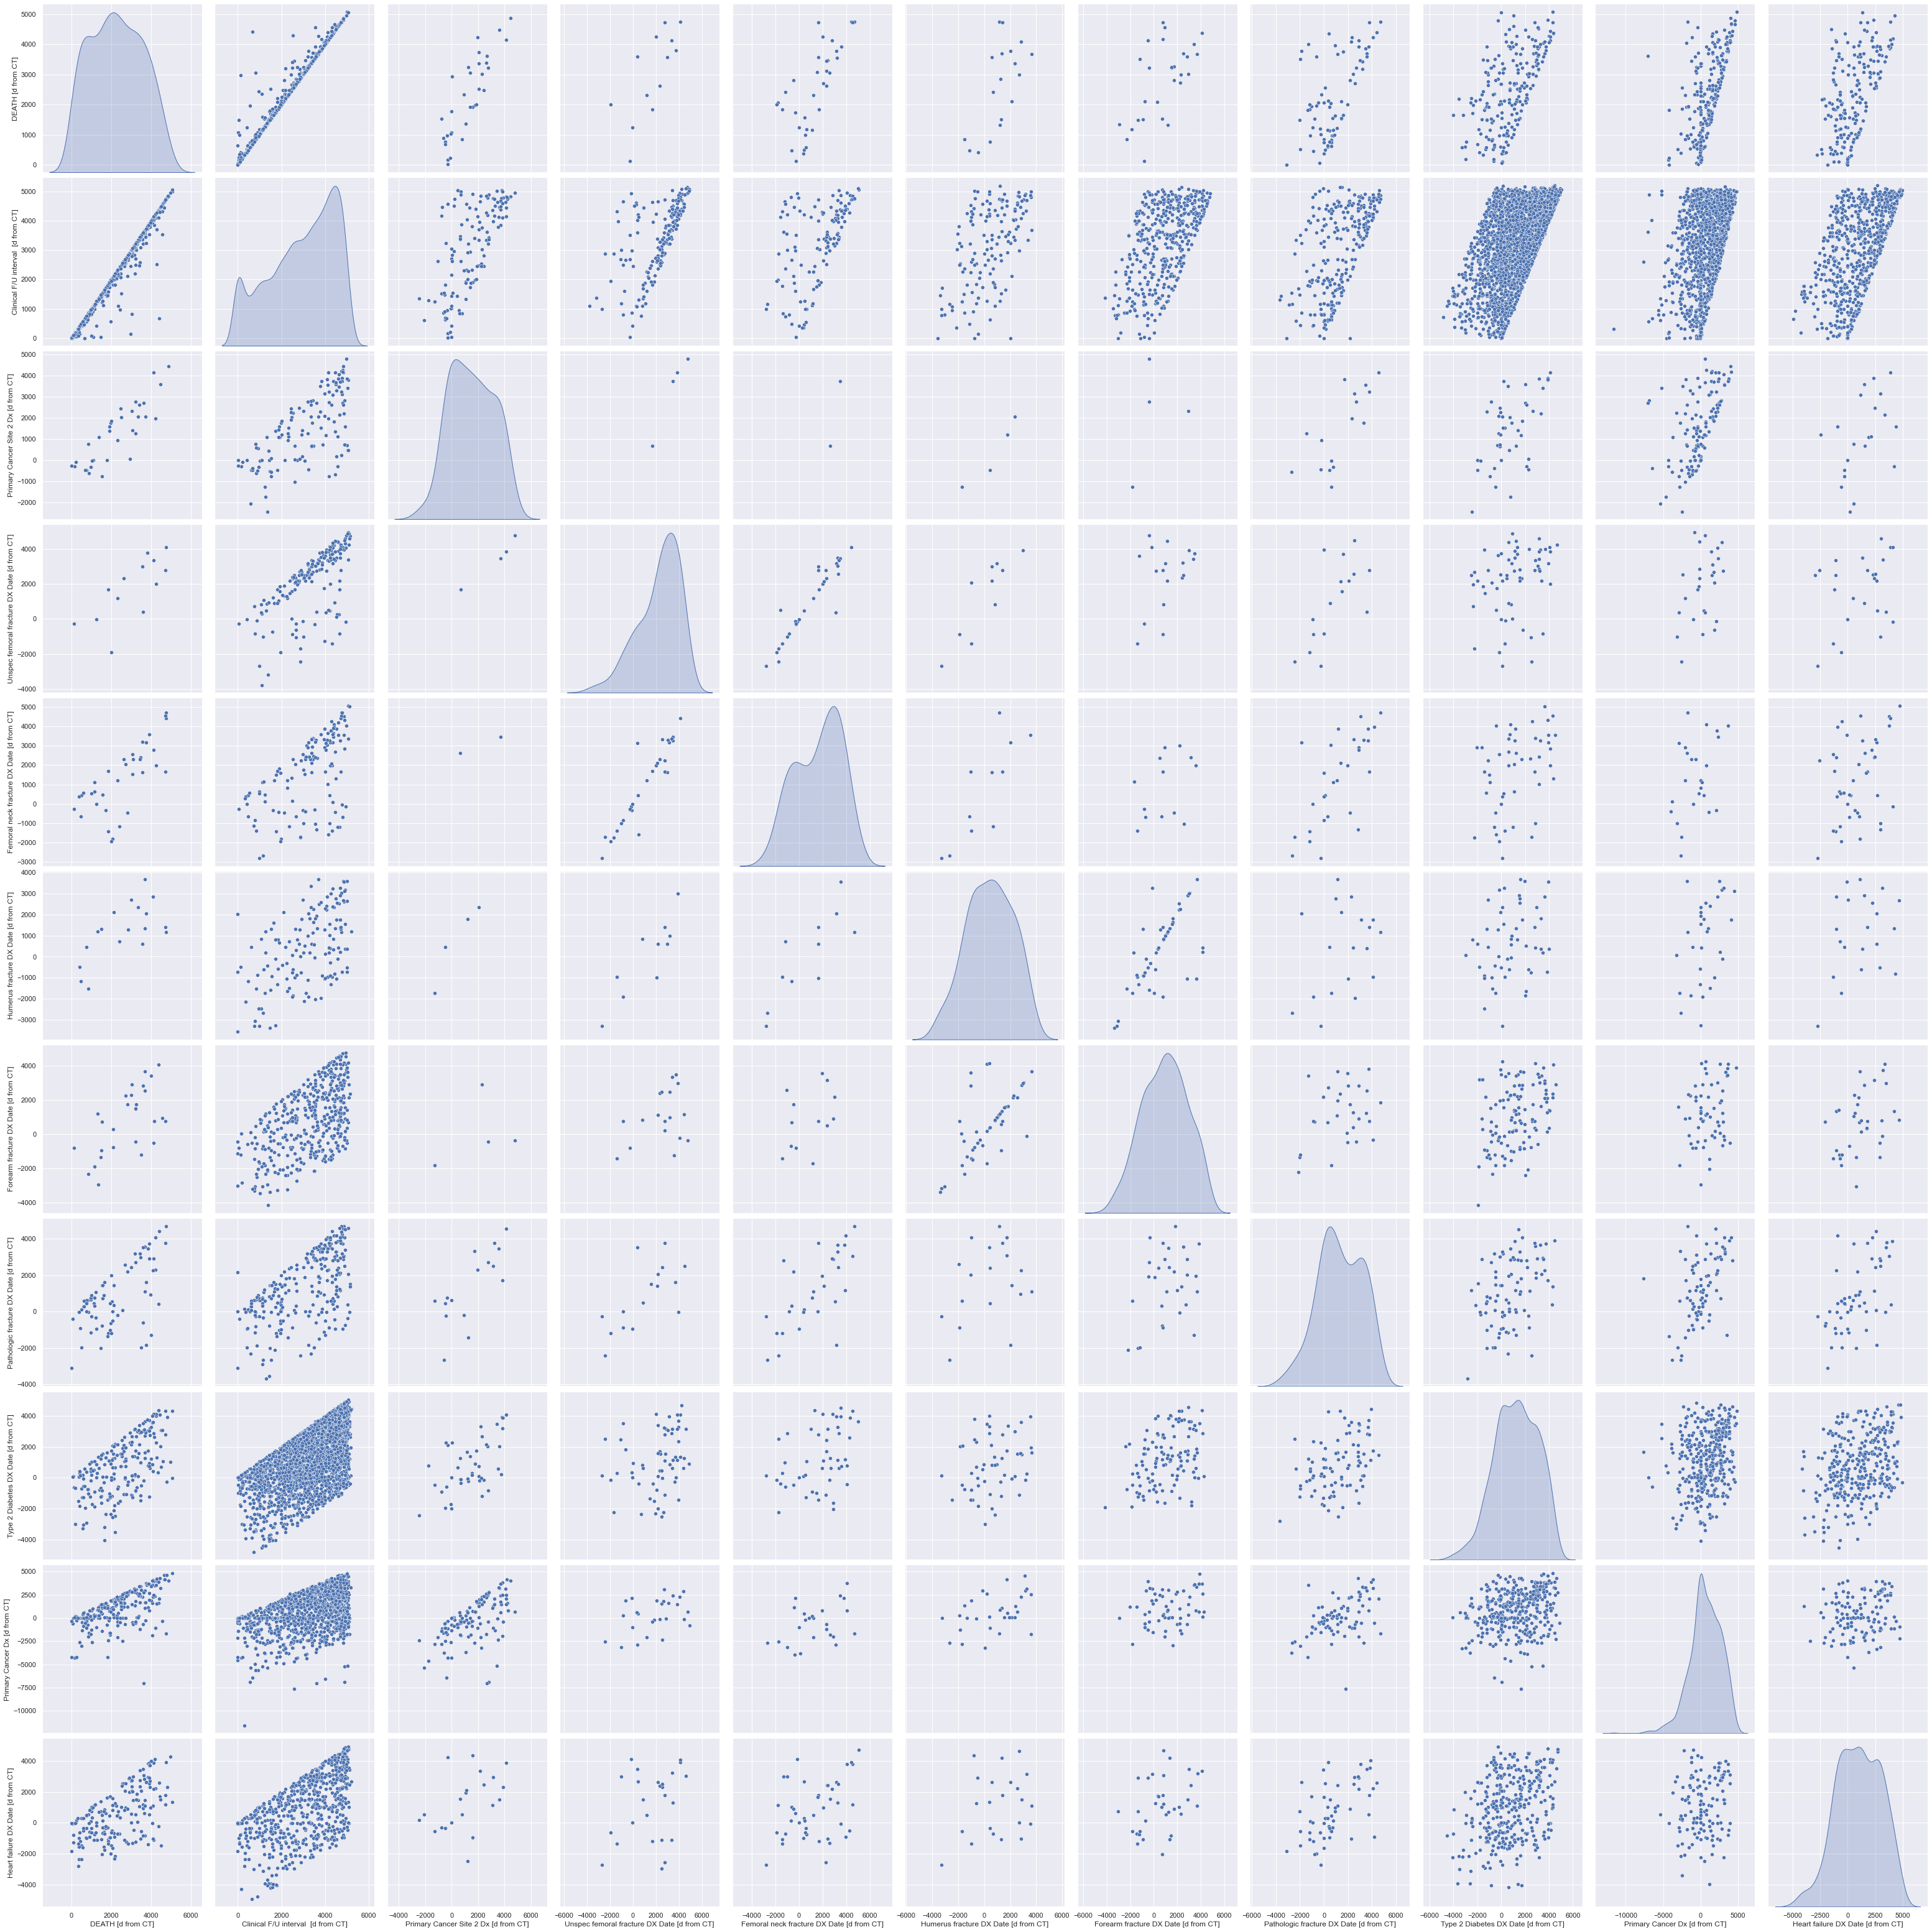

In [71]:
sns.set()
columns = ['DEATH [d from CT]', 'Clinical F/U interval  [d from CT]',
       'Primary Cancer Site 2 Dx [d from CT]',
       'Unspec femoral fracture DX Date [d from CT]',
       'Femoral neck fracture DX Date [d from CT]',
       'Humerus fracture DX Date [d from CT]',
       'Forearm fracture DX Date [d from CT]',
       'Pathologic fracture DX Date [d from CT]',
       'Type 2 Diabetes DX Date [d from CT]', 'Primary Cancer Dx [d from CT]',
       'Heart failure DX Date [d from CT]']
sns.pairplot(df[columns],size = 4 ,kind ='scatter',diag_kind='kde')
plt.show()

In [92]:

# k= 11
# cols = df.corr().nlargest(k,'Forearm fracture DX Date [d from CT]')['Forearm fracture DX Date [d from CT]'].index
# print(cols)
# cm = np.corrcoef(df[cols].values.T)
# f , ax = plt.subplots(figsize = (14,12))
# sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
#             linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)
# sns.set()
# columns = ['Forearm fracture DX Date [d from CT]',
#        'Alzheimers DX Date [d from CT]',
#        'Humerus fracture DX Date [d from CT]', 'DEATH [d from CT]',
#        'Clinical F/U interval  [d from CT]',
#        'Femoral neck fracture DX Date [d from CT]',
#        'Heart failure DX Date [d from CT]',
#        'Type 2 Diabetes DX Date [d from CT]',
#        'Primary Cancer Site 2 Dx [d from CT]',
#        'Unspec femoral fracture DX Date [d from CT]',
#        'Pathologic fracture DX Date [d from CT]']
# sns.pairplot(df[columns],size = 4 ,kind ='scatter',diag_kind='kde')
# plt.show()

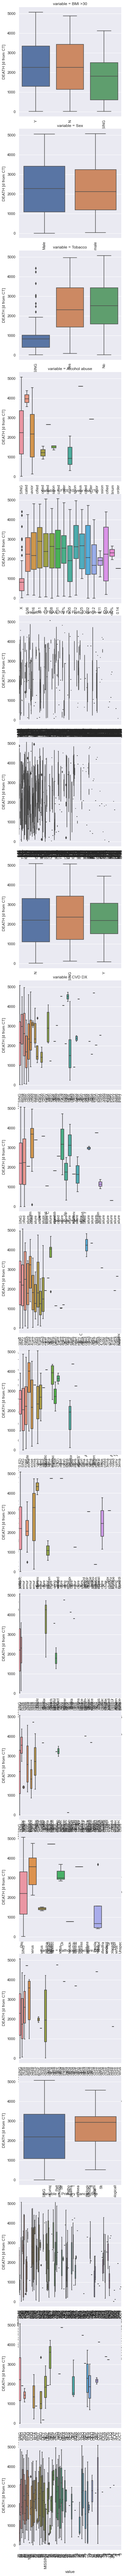

In [97]:
for c in categorical_features:
    df[c] = df[c].astype('category')
    if df[c].isnull().any():
        df[c] = df[c].cat.add_categories(['MISSING'])
        df[c] = df[c].fillna('MISSING')

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(df, id_vars=['DEATH [d from CT]'], value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "DEATH [d from CT]")

In [108]:
for column_name in df.columns:
    if column_name in categorical_features.columns:
#         df[column_name] = df[column_name].fillna(df[column_name].mode().iloc[0])
        unique_category = len(df[column_name].unique())
        print("Feature '{column_name}' has '{unique_category}' unique categories".format(column_name = column_name,
                                                                                         unique_category=unique_category))
 

Feature 'BMI >30' has '3' unique categories
Feature 'Sex' has '2' unique categories
Feature 'Tobacco' has '3' unique categories
Feature 'Alcohol abuse' has '19' unique categories
Feature 'FRS 10-year risk (%)' has '17' unique categories
Feature 'FRAX 10y Fx Prob (Orange-w/ DXA)' has '1380' unique categories
Feature 'FRAX 10y Hip Fx Prob (Orange-w/ DXA)' has '636' unique categories
Feature 'Met Sx' has '3' unique categories
Feature 'CVD DX' has '47' unique categories
Feature 'Heart failure DX' has '27' unique categories
Feature 'MI DX' has '40' unique categories
Feature 'Type 2 Diabetes DX' has '35' unique categories
Feature 'Femoral neck fracture DX' has '30' unique categories
Feature 'Unspec femoral fracture DX' has '62' unique categories
Feature 'Forearm fracture DX' has '53' unique categories
Feature 'Humerus fracture DX' has '11' unique categories
Feature 'Pathologic fracture DX' has '44' unique categories
Feature 'Alzheimers DX' has '2' unique categories
Feature 'Primary Cancer Si

In [63]:
df['BMI >30'].value_counts()

N    5984
Y    3116
Name: BMI >30, dtype: int64

In [205]:
# First, we'll import pandas, a data processing and CSV file I/O library
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import missingno as msno

# We'll also import seaborn, a Python graphing library
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

# Next, we'll load the Iris flower dataset, which is in the "../input/" directory
df = pd.read_excel("./OppScrData.xlsx") # the iris dataset is now a Pandas DataFrame

# Let's see what's in the iris data - Jupyter notebooks print the result of the last thing you do
# df.head()
df.describe()

# Press shift+enter to execute this cell

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

# cat_enc = categorical_features.dropna()
print(categorical_features.shape)
# print(cat_enc.shape)
ord_enc = OrdinalEncoder()
# cat_enc["BMI >30"] = ord_enc.fit_transform(cat_enc[["BMI >30"]])
# cat_enc[["BMI >30"]].head(11)
clin_outcomes_cat = np.array(['CVD DX', 'Heart failure DX', 'MI DX', 'Type 2 Diabetes DX', 'Femoral neck fracture DX', 'Unspec femoral fracture DX', 'Forearm fracture DX', 'Humerus fracture DX', 'Pathologic fracture DX', 'Alzheimers DX', 'Primary Cancer Site', 'Primary Cancer Site 2'])

le = LabelEncoder()
for cat in clin_outcomes_cat:
    print(df[cat])
    idx = ~df[cat].isna()
    df.loc[idx, cat] = le.fit(df.loc[idx, cat]).transform(df.loc[idx, cat])
    print(df[cat])


(9223, 21)
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
9218    NaN
9219    NaN
9220    NaN
9221    NaN
9222    NaN
Name: CVD DX, Length: 9223, dtype: object
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
9218    NaN
9219    NaN
9220    NaN
9221    NaN
9222    NaN
Name: CVD DX, Length: 9223, dtype: object
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
9218    NaN
9219    NaN
9220    NaN
9221    NaN
9222    NaN
Name: Heart failure DX, Length: 9223, dtype: object
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
9218    NaN
9219    NaN
9220    NaN
9221    NaN
9222    NaN
Name: Heart failure DX, Length: 9223, dtype: object
0       Coronaryatherosclerosisofunspecifiedtypeofvess...
1                                                     NaN
2                                                     NaN
3       Coronaryatherosclerosisofunspecifiedtypeofvess...
4                                        

In [206]:
# print(_df[col])
# print(df[col])
# unique, counts = np.unique(_df[col], return_counts=True)
# dict(zip(unique, counts))

ct_data_cols = np.array(['TAT Area (cm2)', 'VAT/SAT     Ratio', 'L3 SMI (cm2/m2)', 'AoCa        Agatston', 'Muscle HU'])
df = df.dropna(subset = ['TAT Area (cm2)', 'VAT/SAT     Ratio', 'L3 SMI (cm2/m2)', 'AoCa        Agatston', 'Muscle HU'])
print(df.shape)


(8951, 52)


In [210]:
from sklearn.linear_model import LinearRegression
ct_data = df[ct_data_cols[0]]
i=0

for col in ct_data_cols:
    if i!=0:
        ct_data = np.vstack((ct_data, df[col]))
    i+=1
    
for col in clin_outcomes_cat:
    y = df[col]
    print(col)
    data = np.vstack((ct_data, y.T))
    data = data.T
    idx = ~y.isna()
    train_data = data[idx]
    print(train_data.shape)
    if train_data.shape[0] <100:
        print(col, " not enough data")
        continue
    X = train_data[:-100, :-1]
    y = train_data[:-100, -1]
    reg = LinearRegression().fit(X, y)
    
    X_test = train_data[-100:, :-1]
    y_test = train_data[-100:, -1]
    reg.score(X_test, y_test)
    
    na_idx = ~idx
    predict_data = data[na_idx]
    X_pre = predict_data[:, :-1]
    print(reg.score(X_test, y_test))
    print(reg.predict(X_pre))
    

CVD DX
(858, 6)
0.009211339393120133
[30.4714285  30.0545034  31.60115633 ... 29.24387268 30.73137242
 31.70025515]
Heart failure DX
(605, 6)
0.02979352879006325
[16.07920188 16.39763982 16.68498739 ... 16.22148546 16.55235513
 16.17430892]
MI DX
(794, 6)
-0.018974839208593997
[22.29881272 21.64799723 23.21301042 ... 21.39966643 22.38173265
 22.97630284]
Type 2 Diabetes DX
(2460, 6)
0.05749224479027226
[10.6600179   9.02979623  8.60800989 ...  8.14680151  6.08261832
  7.1655437 ]
Femoral neck fracture DX
(119, 6)
-0.14613312211742802
[ 7.45869548 10.49131662  2.7495865  ... 11.73579229  7.18374989
  5.74654505]
Unspec femoral fracture DX
(164, 6)
-0.026686257310774453
[21.76095602 23.93679112 20.10414357 ... 21.81726245 21.23177243
 23.60507552]
Forearm fracture DX
(413, 6)
-0.05741867804076639
[18.10872198 17.58430319 19.27216767 ... 14.25984999 18.3947388
 22.52533047]
Humerus fracture DX
(136, 6)
-0.13436797407339895
[3.868442   4.80126569 2.87612247 ... 4.36804263 4.1663191  4.9198

In [157]:
reg.score(X, y)

reg.score(X, y)

0.009565989495885607

In [139]:
train_data.shape

(901, 7)

In [152]:
train_data[:,5].dtype.type

numpy.object_

<AxesSubplot:title={'center':'Log Normal'}>

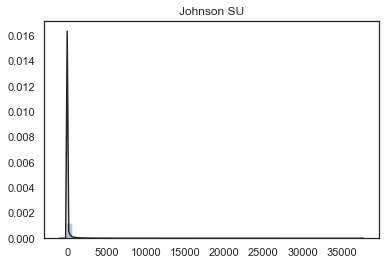

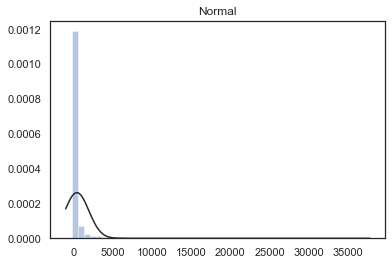

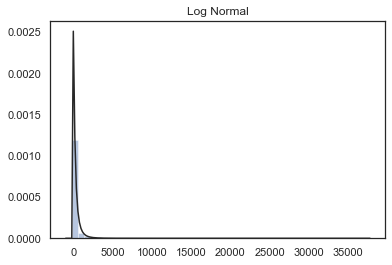

In [179]:
# normal
plt.figure(1); plt.title('Johnson SU')
sns.distplot(X, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(X, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(X, kde=False, fit=st.lognorm)
